In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.linear_model import Perceptron

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten

from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout

from tensorflow.keras.utils import to_categorical

In [19]:
df = pd.read_csv("/content/mnist_train.csv")
df_test = pd.read_csv("/content/mnist_test.csv")

In [20]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
df.shape

(60000, 785)

In [22]:
df.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [25]:
df.isnull().sum()

,0
label,0
1x1,0
1x2,0
1x3,0
1x4,0
...,...
28x24,0
28x25,0
28x26,0
28x27,0


## Preprocessing

In [26]:
X_train = df.drop("label", axis=1).values
y_train = df["label"].values
X_test = df_test.drop("label", axis=1).values
y_test = df_test["label"].values

In [27]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [28]:
X_train_img = X_train.reshape(-1, 28, 28)
X_test_img = X_test.reshape(-1, 28, 28)

In [29]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Perceptron Model

In [30]:
perceptron = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(10, activation="softmax")
])

In [31]:
perceptron.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [32]:
history_percp = perceptron.fit(X_train_img, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test_img, y_test_cat), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7108 - loss: 1.1364 - val_accuracy: 0.8822 - val_loss: 0.4805
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8775 - loss: 0.4745 - val_accuracy: 0.8957 - val_loss: 0.4001
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8909 - loss: 0.4088 - val_accuracy: 0.9020 - val_loss: 0.3670
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8937 - loss: 0.3869 - val_accuracy: 0.9060 - val_loss: 0.3486
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8998 - loss: 0.3634 - val_accuracy: 0.9091 - val_loss: 0.3365


In [35]:
acc_precep = perceptron.evaluate(X_test_img, y_test_cat, verbose=0)[1]
print("Accuracy: ", acc_precep)

Accuracy:  0.9090999960899353


# ANN Model

In [36]:
ann=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

In [37]:
ann.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [38]:
history_ann = ann.fit(X_train_img, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test_img, y_test_cat), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8807 - loss: 0.4177 - val_accuracy: 0.9631 - val_loss: 0.1157
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9697 - loss: 0.1012 - val_accuracy: 0.9719 - val_loss: 0.0858
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9790 - loss: 0.0662 - val_accuracy: 0.9713 - val_loss: 0.0901
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9853 - loss: 0.0472 - val_accuracy: 0.9772 - val_loss: 0.0733
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9872 - loss: 0.0393 - val_accuracy: 0.9766 - val_loss: 0.0783


In [39]:
acc_ann = ann.evaluate(X_test_img, y_test_cat, verbose=0)[1]
print("Accuracy: ", acc_ann)

Accuracy:  0.9765999913215637


# CNN Model

In [40]:
X_train_cnn = X_train.reshape(-1, 28, 28,1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

In [41]:
cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation="relu"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

In [42]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [43]:
history_cnn = cnn.fit(X_train_cnn, y_train_cat, epochs=5, batch_size=32, validation_data=(X_test_cnn, y_test_cat), verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.8587 - loss: 0.4379 - val_accuracy: 0.9834 - val_loss: 0.0540
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9742 - loss: 0.0878 - val_accuracy: 0.9888 - val_loss: 0.0356
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9824 - loss: 0.0598 - val_accuracy: 0.9903 - val_loss: 0.0312
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 29ms/step - accuracy: 0.9845 - loss: 0.0512 - val_accuracy: 0.9909 - val_loss: 0.0289
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9864 - loss: 0.0412 - val_accuracy: 0.9921 - val_loss: 0.0261


In [51]:
acc_cnn = cnn.evaluate(X_test_cnn, y_test_cat, verbose=0)[1]
print("Accuracy: ", acc_cnn)

Accuracy:  0.9921000003814697


# Visualization of the Models

## Perceptron Visualization

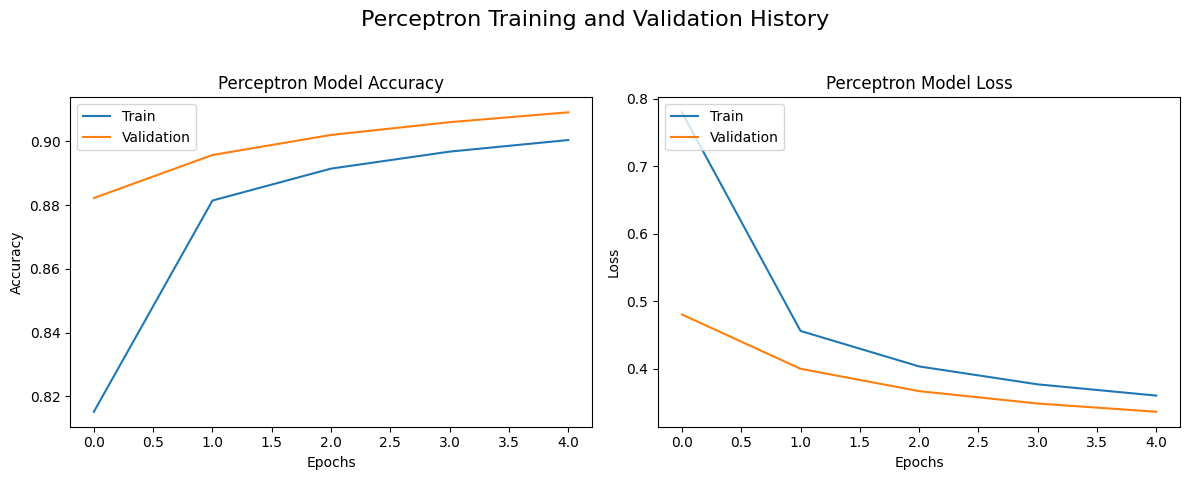

In [52]:
plt.figure(figsize=(12, 5))
plt.suptitle('Perceptron Training and Validation History', fontsize=16)

plt.subplot(1, 2, 1)
plt.plot(history_percp.history['accuracy'])
plt.plot(history_percp.history['val_accuracy'])
plt.title('Perceptron Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_percp.history['loss'])
plt.plot(history_percp.history['val_loss'])
plt.title('Perceptron Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## ANN Visualization

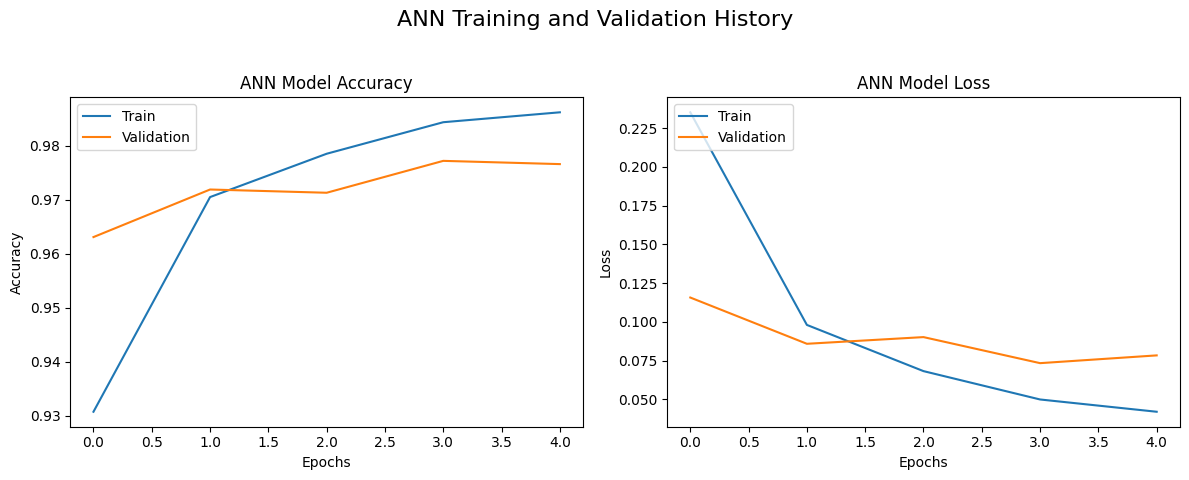

In [53]:
plt.figure(figsize=(12, 5))
plt.suptitle('ANN Training and Validation History', fontsize=16)

plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'])
plt.plot(history_ann.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'])
plt.plot(history_ann.history['val_loss'])
plt.title('ANN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## CNN Visualization

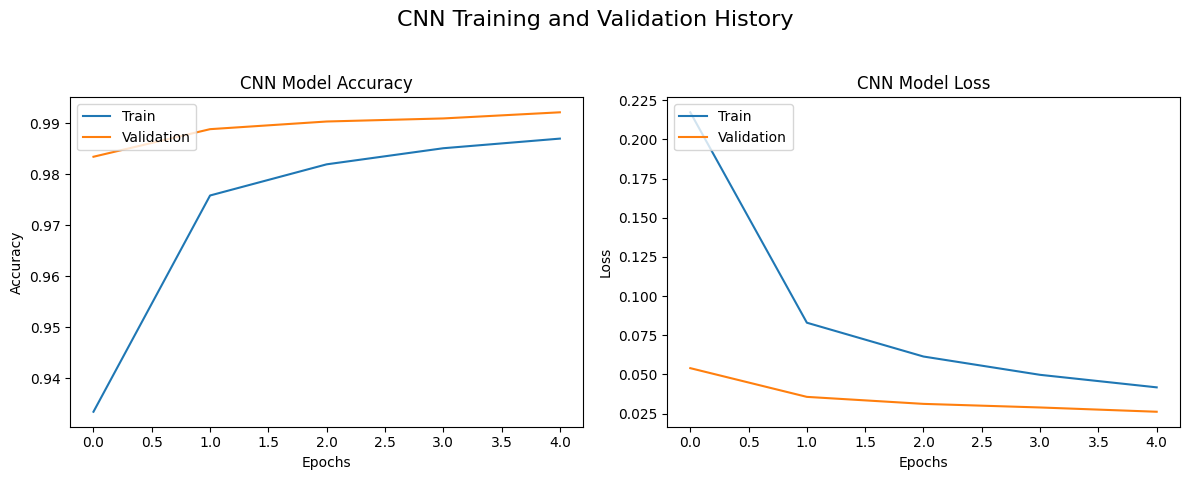

In [54]:
plt.figure(figsize=(12, 5))
plt.suptitle('CNN Training and Validation History', fontsize=16)

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Training for Numbers(0-10)

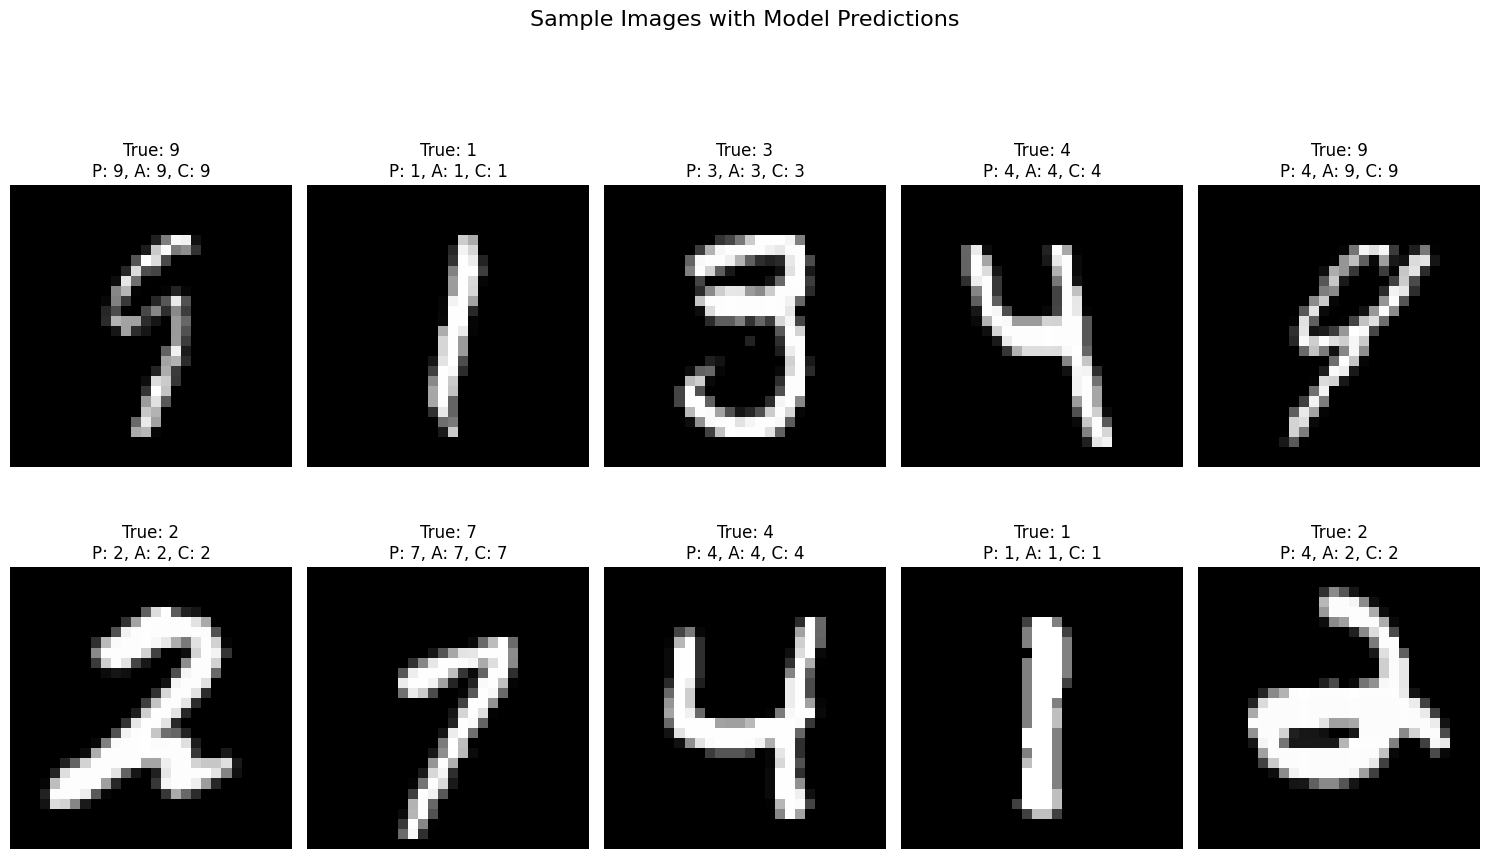

In [56]:
num_samples = 10
random_indices = np.random.choice(len(X_test_img), num_samples, replace=False)

plt.figure(figsize=(15, 10))
plt.suptitle('Sample Images with Model Predictions', fontsize=16)

for i, idx in enumerate(random_indices):
    true_label = y_test[idx]
    image = X_test_img[idx]

    image_for_percep_ann = image.reshape(1, 28, 28)

    image_for_cnn = X_test_cnn[idx].reshape(1, 28, 28, 1)

    pred_percep = np.argmax(perceptron.predict(image_for_percep_ann, verbose=0))
    pred_ann = np.argmax(ann.predict(image_for_percep_ann, verbose=0))
    pred_cnn = np.argmax(cnn.predict(image_for_cnn, verbose=0))

    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}\nP: {pred_percep}, A: {pred_ann}, C: {pred_cnn}")
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Confusion Matrix for CNN

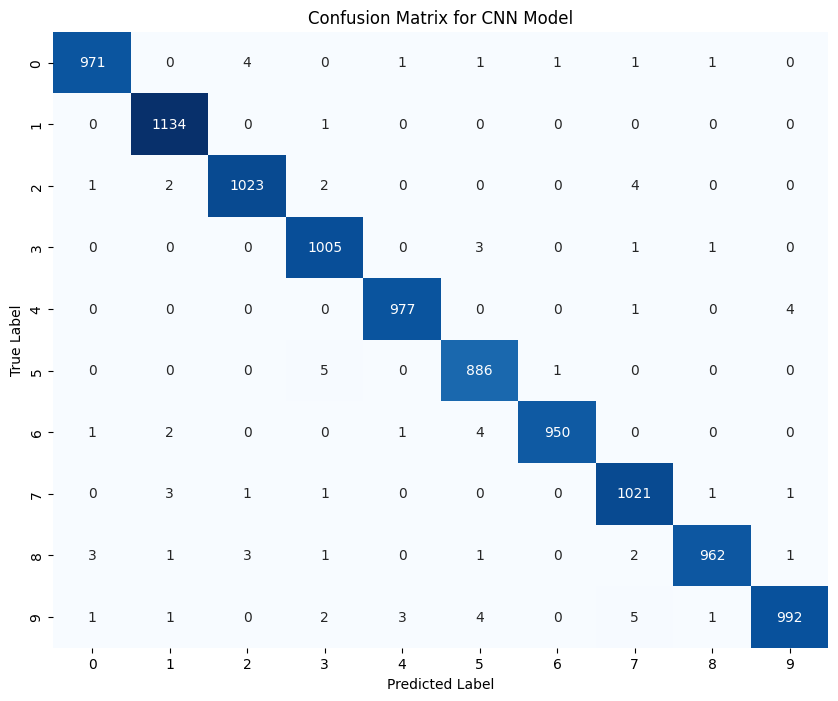

In [57]:
y_pred_cnn = np.argmax(cnn.predict(X_test_cnn, verbose=0), axis=1)

cm_cnn = confusion_matrix(y_test, y_pred_cnn)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for CNN Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Accuracies Comparison

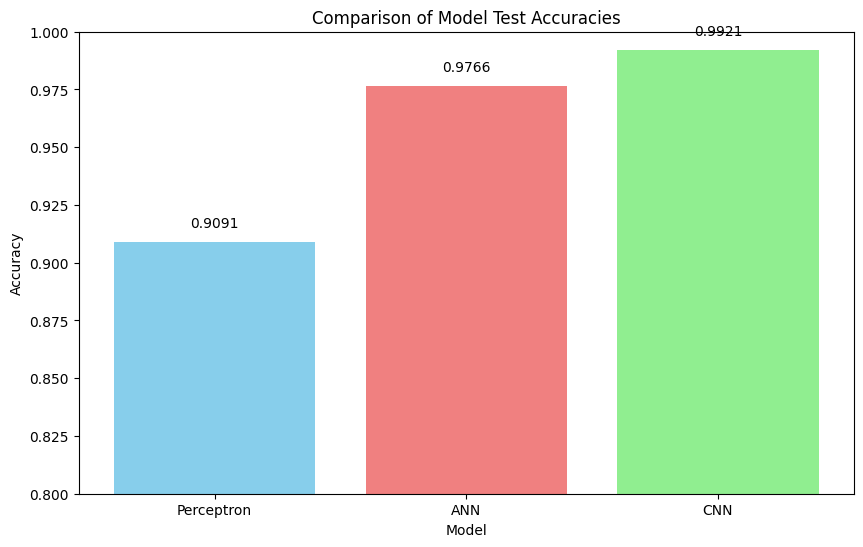

In [58]:
model_names = ['Perceptron', 'ANN', 'CNN']
accuracies = [acc_precep, acc_ann, acc_cnn]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Test Accuracies')
plt.ylim(0.8, 1.0)

for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f'{acc:.4f}', ha='center', va='bottom')

plt.show()

# Saving the CNN Model

In [59]:
cnn.save("cnn_model.h5")